In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Random Data

### • Choose your distribution and specify the parameters.
### • Generate at least 100 data points.
### • Plot the data points on a 2D scatter plot. plot.

In [290]:
# determining the values of the parameters (mean and variance)
mu = 0      #mean
sigma = 1   #variance
n = 100     #total points
alpha = 1   #slope
beta = 2    #intercept

# using the np.random.normal() method for generating 100 random data points.
random_data_points_x = [np.random.normal(mu, sigma) for i in range(0,n)]
# using simple linear regression formula {y = a ∗ x + b + epsilon} for calculating corrosponding y values.
random_data_points_y = [(alpha*i)+beta+np.random.normal(0,0.5) for i in random_data_points_x]

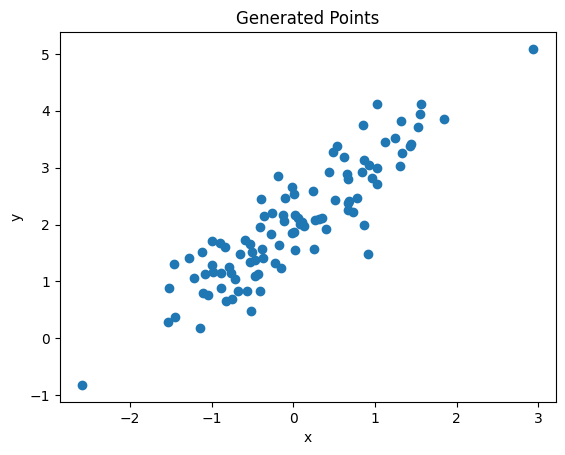

In [291]:
plt.scatter(random_data_points_x,random_data_points_y) #Scatter plot
plt.xlabel("x") #x label
plt.ylabel("y") #y label
plt.title("Generated Points") #title
plt.show()

# Step 2: Perform Linear Regression Without Neural Networks

### • Fit a linear regression model to the data.
### • Plot the regression line.
### • Comment on the mathematical operations used (e.g., computing the best fit line).

In [292]:
slope = 0 #assigning initial value of slope
sum_of_squared_residuals_list = [] #empty list to store sum_of_squared_residuals
num_epoch = 1000 #number of epochs
slopeList = [] #empty list to store change in slope values
interceptList = [] #empty list to store change in intercept values
for epoch in range (0,num_epoch):
    slope = 0.01+slope #Change in slope
    intercept = 0 #initial value of intercept
    for counter in range(0,100):
        intercept = 0.1+intercept #change in intercept
        sum_of_squared_residuals = 0
        for x,y in zip(random_data_points_x,random_data_points_y):
            predicted_y = (slope * x) + intercept
            sum_of_squared_residuals = sum_of_squared_residuals+(y-predicted_y)**2
        sum_of_squared_residuals_list.append(sum_of_squared_residuals)
        slopeList.append(slope)
        interceptList.append(intercept)

In [293]:
least_value_index = sum_of_squared_residuals_list.index(min(sum_of_squared_residuals_list))

In [294]:
least_value_index

10019

In [295]:
# bestFitLine_x = [i for i in range(-3,3)]
bestFitLine_y = [(slopeList[least_value_index]*i)+interceptList[least_value_index] for i in random_data_points_x]

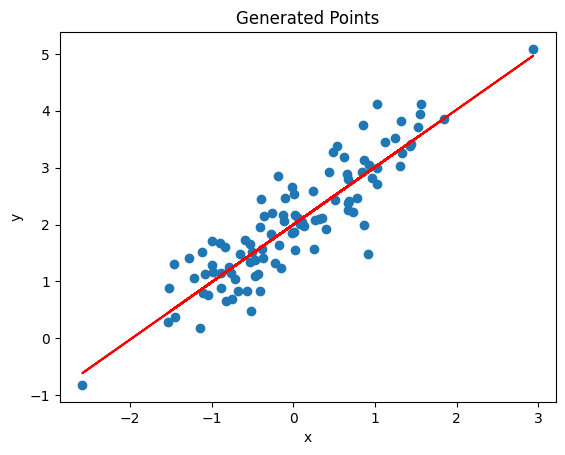

In [296]:
plt.scatter(random_data_points_x,random_data_points_y) #Scatter plot
plt.plot(random_data_points_x,bestFitLine_y, color = "red")
plt.xlabel("x") #x label
plt.ylabel("y") #y label
plt.title("Generated Points") #title
plt.show()

In [297]:
# plt.plot(sum_of_squared_residuals_list[:20000])
# plt.plot(least_value_index,sum_of_squared_residuals_list[least_value_index], marker='o')

In [298]:
sum_of_squared_residuals_list[least_value_index]

21.307102968629

Intercept: 2.035141741054691
Coefficient: [1.00955336]


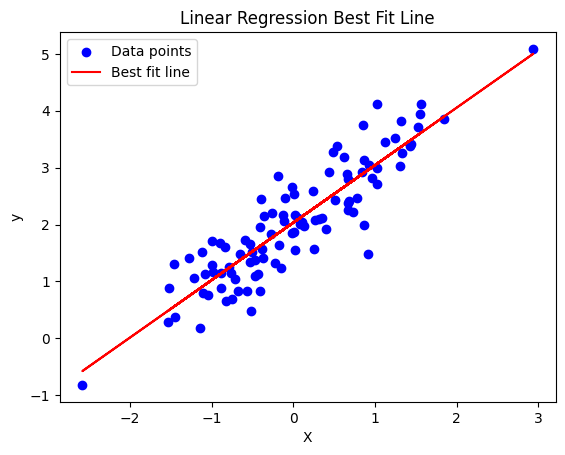

In [299]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(np.array(random_data_points_x).reshape(-1,1), random_data_points_y)
# Print the parameters
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_}")

plt.scatter(random_data_points_x, random_data_points_y, color="blue", label="Data points")
plt.plot(random_data_points_x, lin_reg.predict(np.array(random_data_points_x).reshape(-1,1)), color="red", label="Best fit line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Best Fit Line")
plt.show()

In [300]:
slopeList[least_value_index],interceptList[least_value_index]

(1.0100000000000007, 2.0000000000000004)